In [1]:
### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

### Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

### The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

### Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

### The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
###     In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer M (Malignant) and B (Bengin)
###     This analysis has been done using Basic Machine Learning Algorithm with detailed explanation
###     This is good for beginners like as me Lets start.
###     4.Attribute Information:
###     
###     1) ID number
###     
###     2) Diagnosis (M = malignant, B = benign)
###     
###     -3-32.Ten real-valued features are computed for each cell nucleus:
###     
###     a) radius (mean of distances from center to points on the perimeter)
###     
###     b) texture (standard deviation of gray-scale values)
###     
###     c) perimeter
###     
###     d) area
###     
###     e) smoothness (local variation in radius lengths)
###     
###     f) compactness (perimeter^2 / area - 1.0)
###     
###     g). concavity (severity of concave portions of the contour)
###     
###     h). concave points (number of concave portions of the contour)
###     
###     i). symmetry
###     
###     j). fractal dimension ("coastline approximation" - 1)
###     
###     5 here 3- 32 are divided into three parts first is Mean (3-13), Stranded Error(13-23) and Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension)
###     
###     Here Mean means the means of the all cells, standard Error of all cell and worst means the worst cell


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import os
os.environ['KAGGLE_USERNAME']='nuttunyodsanga'
os.environ['KAGGLE_KEY']='742d8ae7e33027340f8d0020dbcf36f0'


In [4]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile as zf

files = zf.ZipFile("breast-cancer-wisconsin-data.zip",'r')
files.extractall()
files.close()

In [6]:
df=pd.read_csv('data.csv')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
# Saw that 3 type (mean,SE,worst) of 10 variable

In [9]:
df.shape

(569, 33)

In [10]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [12]:
df.shape

(569, 32)

In [13]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)

In [16]:
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [17]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


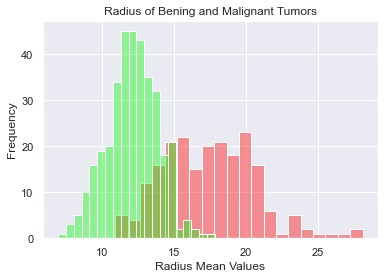

In [19]:
a = plt.hist(df[df["diagnosis"] == 1]['radius_mean'],bins=20,fc = (1,0,0,0.4),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == 0]['radius_mean'],bins=20,fc = (0,1,0,0.4),label = "Benign")
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Radius of Bening and Malignant Tumors")
plt.show()


In [20]:
#Watch all of the graphs to decide which column should be dropped.

In [21]:
def hist(x,i):
    plt.subplot(1,5,i)
    plt.hist(df[df["diagnosis"] == 1][x],bins=20,fc = (1,0,0,0.4),label = "Malignant")
    plt.hist(df[df["diagnosis"] == 0][x],bins=20,fc = (0,1,0,0.4),label = "Benign")
    plt.title(x + ' of Benign and Malignant')
    plt.xlabel(x)
    plt.ylabel("Frequency")

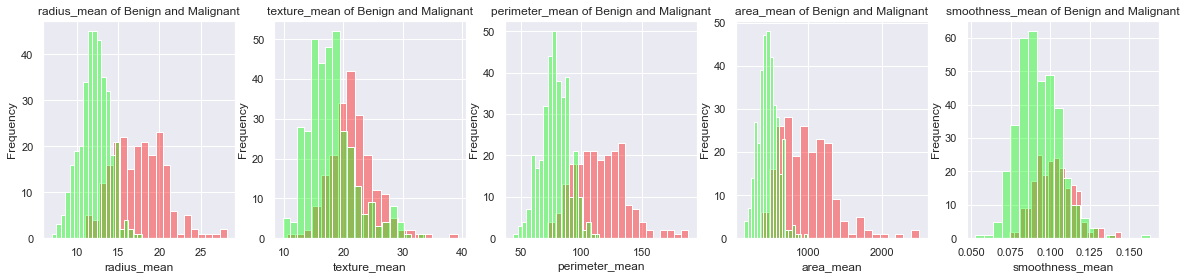

In [22]:
plt.figure(figsize=(20,4))
hist('radius_mean', 1)
hist('texture_mean', 2)
hist('perimeter_mean', 3)
hist('area_mean', 4)
hist('smoothness_mean', 5)

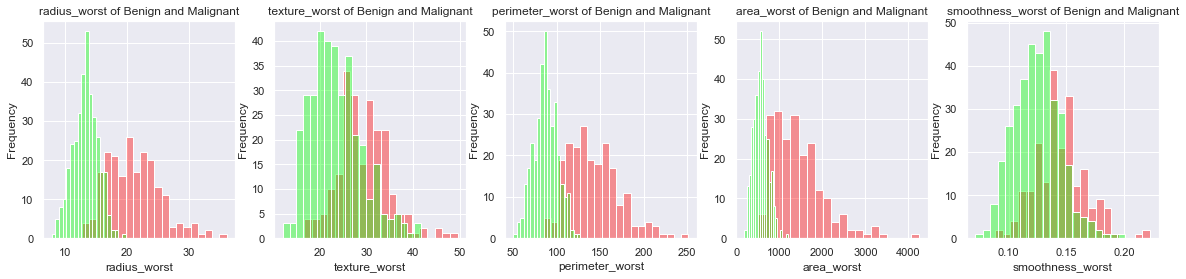

In [23]:
plt.figure(figsize=(20,4))
hist('radius_worst', 1)
hist('texture_worst', 2)
hist('perimeter_worst', 3)
hist('area_worst', 4)
hist('smoothness_worst', 5)

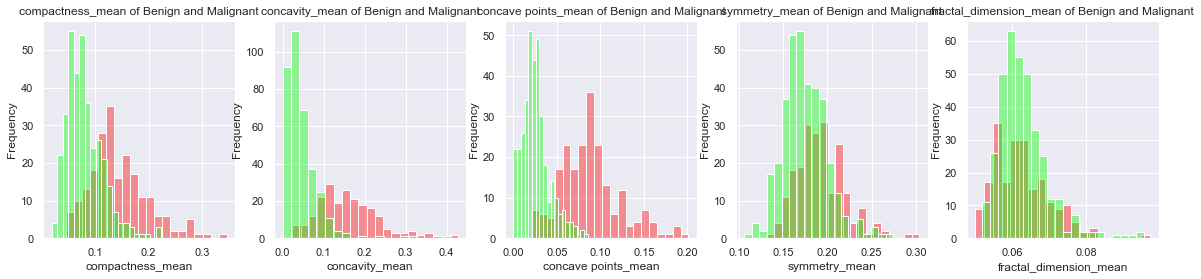

In [24]:
plt.figure(figsize=(20,4))
hist('compactness_mean', 1)
hist('concavity_mean', 2)
hist('concave points_mean', 3)
hist('symmetry_mean', 4)
hist('fractal_dimension_mean', 5)

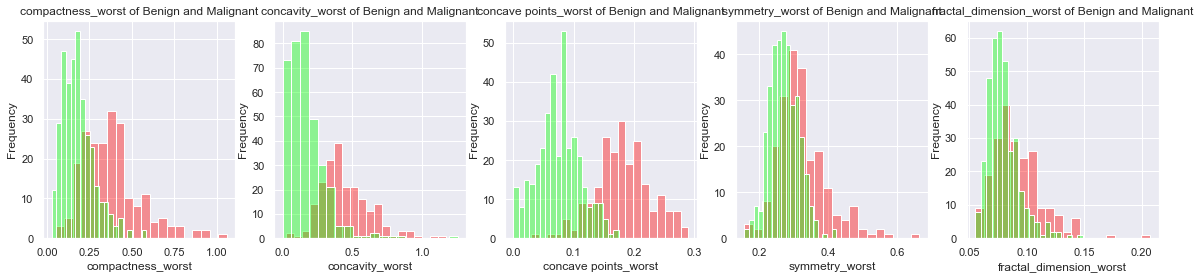

In [25]:
plt.figure(figsize=(20,4))
hist('compactness_worst', 1)
hist('concavity_worst', 2)
hist('concave points_worst', 3)
hist('symmetry_worst', 4)
hist('fractal_dimension_worst', 5)

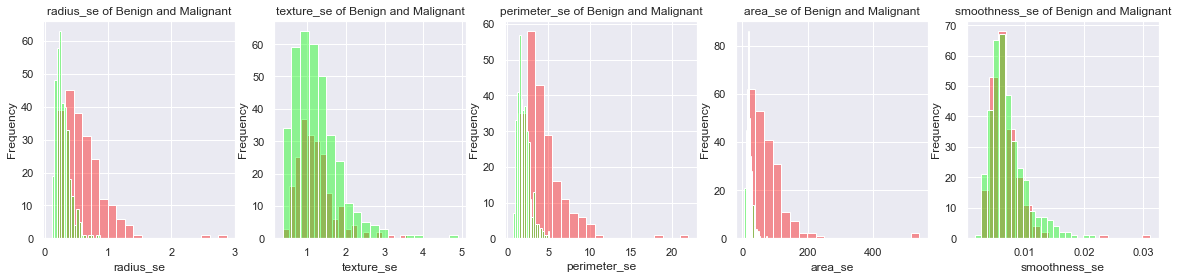

In [26]:
plt.figure(figsize=(20,4))
hist('radius_se', 1)
hist('texture_se', 2)
hist('perimeter_se', 3)
hist('area_se', 4)
hist('smoothness_se', 5)

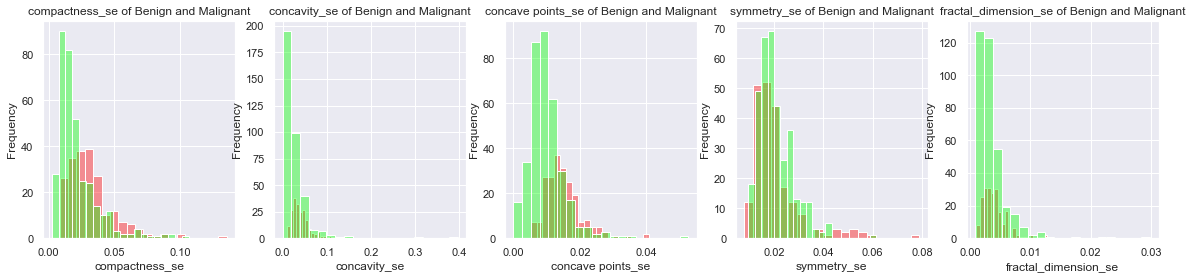

In [27]:
plt.figure(figsize=(20,4))
hist('compactness_se', 1)
hist('concavity_se', 2)
hist('concave points_se', 3)
hist('symmetry_se', 4)
hist('fractal_dimension_se', 5)

In [28]:
def scatter(x,i):
    plt.subplot(1,5,i)
    plt.scatter(df[x],df['diagnosis'])
    plt.title(x + ' of Benign and Malignant')
    plt.xlabel(x)
    plt.ylabel("diagnosis")

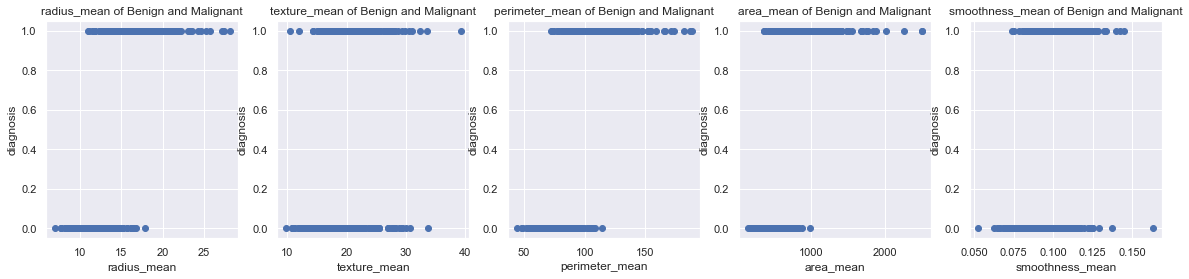

In [29]:
plt.figure(figsize=(20,4))
scatter('radius_mean', 1)
scatter('texture_mean', 2)
scatter('perimeter_mean', 3)
scatter('area_mean', 4)
scatter('smoothness_mean', 5)

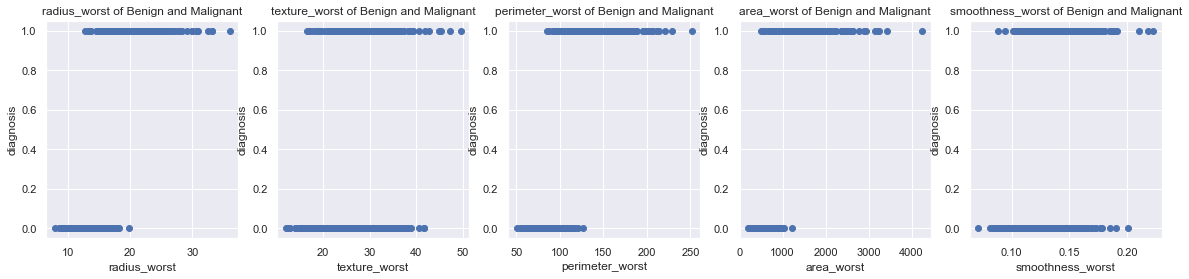

In [30]:
plt.figure(figsize=(20,4))
scatter('radius_worst', 1)
scatter('texture_worst', 2)
scatter('perimeter_worst', 3)
scatter('area_worst', 4)
scatter('smoothness_worst', 5)

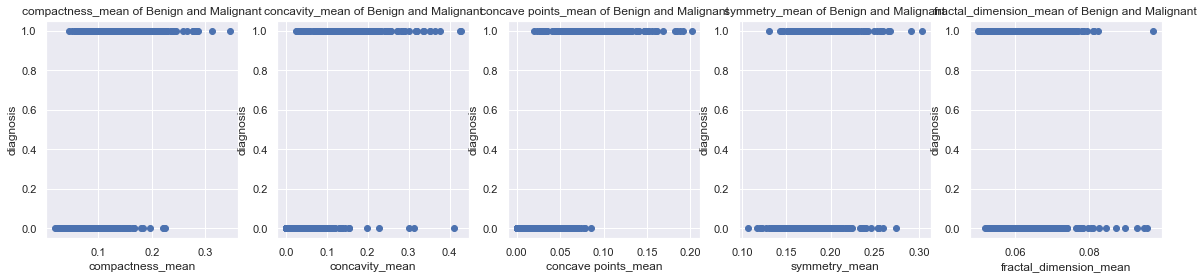

In [31]:
plt.figure(figsize=(20,4))
scatter('compactness_mean', 1)
scatter('concavity_mean', 2)
scatter('concave points_mean', 3)
scatter('symmetry_mean', 4)
scatter('fractal_dimension_mean', 5)

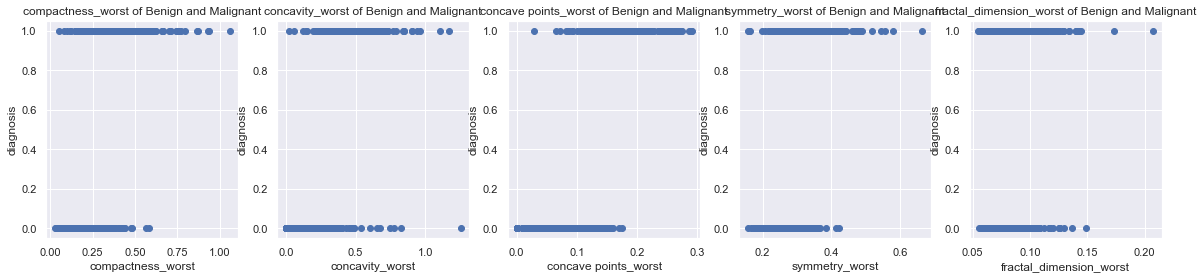

In [32]:
plt.figure(figsize=(20,4))
scatter('compactness_worst', 1)
scatter('concavity_worst', 2)
scatter('concave points_worst', 3)
scatter('symmetry_worst', 4)
scatter('fractal_dimension_worst', 5)

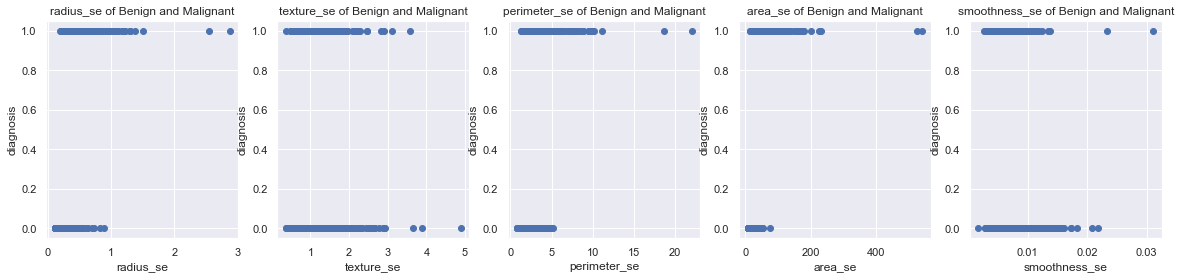

In [33]:
plt.figure(figsize=(20,4))
scatter('radius_se', 1)
scatter('texture_se', 2)
scatter('perimeter_se', 3)
scatter('area_se', 4)
scatter('smoothness_se', 5)

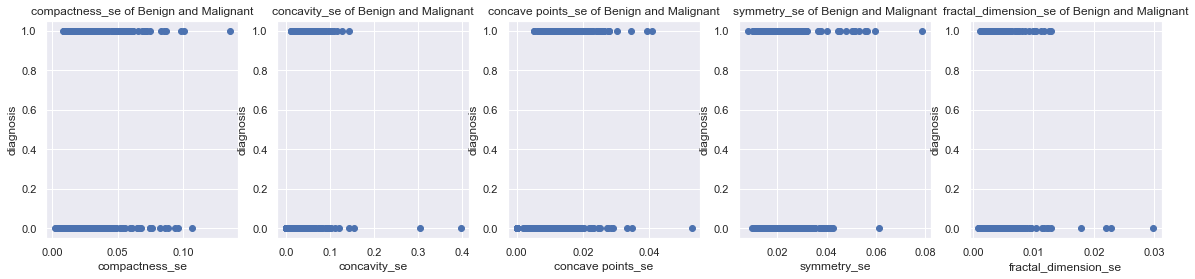

In [34]:
plt.figure(figsize=(20,4))
scatter('compactness_se', 1)
scatter('concavity_se', 2)
scatter('concave points_se', 3)
scatter('symmetry_se', 4)
scatter('fractal_dimension_se', 5)

In [35]:
#Decided to drop all of the Stranded Error columns.
#Selected some columns from the mean and some columns from the worst to avoid. Multicollinearity and overfitting.
#Decided to select 6 columns:  concavity_mean , concave points_mean, texture_worst, area_worst, smoothness_worst,  symmetry_worst

In [36]:
df2=df.copy()

In [37]:
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
df2=df2[['diagnosis', 'concavity_mean' , 'concave points_mean', 'texture_worst', 'area_worst', 'smoothness_worst',  'symmetry_worst']]

In [39]:
y=df2.iloc[:,0].values
x=df2.iloc[:,1:].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [43]:
x_train=standardscaler.fit_transform(x_train)
x_test=standardscaler.fit_transform(x_test)

In [44]:
x_train

array([[ 0.20672849,  0.26655389, -0.05284144, -0.62164797, -0.16101408,
        -1.06275798],
       [-0.65950461, -0.73122699, -1.04033934, -0.91571284,  0.15872685,
        -0.73263331],
       [-0.82579098, -0.906039  , -0.65786937, -0.29097608, -1.6878865 ,
        -0.34378453],
       ...,
       [-0.45106459, -0.12940283,  0.36095151, -0.57865199,  0.11054671,
        -0.66279924],
       [ 0.74957933,  1.24655302,  1.21326606,  0.81949437,  0.54854798,
        -0.43266425],
       [-0.63499667, -0.54063681, -1.65196158, -0.58279618,  0.86390889,
        -0.18189646]])

In [45]:
x_test

array([[ 3.48464674e-01, -6.70397235e-02,  2.38862140e+00,
        -1.70153740e-01, -1.06600284e+00, -1.81714841e+00],
       [-4.22614533e-01, -4.20097615e-01, -1.09254280e+00,
         1.01465343e-01, -1.13637014e+00, -4.11083671e-01],
       [ 1.17136108e+00,  5.15639645e-01,  1.18456282e+00,
        -6.57582374e-01,  3.78494276e+00,  2.17198763e+00],
       [-6.65551525e-01, -4.14743747e-01, -5.98130139e-01,
        -6.32058561e-01, -1.69745675e-03, -6.15474034e-01],
       [-1.20043419e+00, -1.37814266e+00, -1.27658284e+00,
        -1.13167767e+00, -7.09768392e-01, -5.80234316e-01],
       [-5.71466100e-01, -2.74353414e-01, -5.43541991e-01,
        -3.49201382e-01, -6.08615401e-01,  5.93665594e-02],
       [ 2.19366241e+00,  2.20002620e+00,  1.07070754e+00,
         9.34608308e-01,  1.36606690e+00,  1.07250844e+00],
       [-5.32941334e-02,  3.51156903e-01,  1.77021567e-01,
         1.06032261e+00, -3.93115551e-01,  5.01625016e-01],
       [ 9.73360406e-01, -5.29257048e-01,  4.265

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
classifier=LogisticRegression()

In [48]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [49]:
classifier.intercept_

array([-0.21442685])

In [50]:
classifier.coef_

array([[0.53435796, 1.80672005, 1.38559248, 3.75325495, 0.50118839,
        0.5129748 ]])

In [51]:
sum_table=pd.DataFrame(columns=['Feature name'],data=[ 'concavity_mean' , 'concave points_mean', 'texture_worst', 'area_worst', 'smoothness_worst',  'symmetry_worst'])
sum_table['Coefficient']=np.transpose(classifier.coef_)
sum_table

,Feature name,Coefficient
0,concavity_mean,0.534358
1,concave points_mean,1.806720
2,texture_worst,1.385592
3,area_worst,3.753255
4,smoothness_worst,0.501188
5,symmetry_worst,0.512975


In [52]:
sum_table.index=sum_table.index+1
sum_table.loc[0]=['Intercept',classifier.intercept_[0]]
sum_table=sum_table.sort_index()

In [53]:
sum_table['Odd ratio']= np.exp(sum_table.Coefficient)
sum_table

,Feature name,Coefficient,Odd ratio
0,Intercept,-0.214427,0.807004
1,concavity_mean,0.534358,1.706352
2,concave points_mean,1.806720,6.090438
3,texture_worst,1.385592,3.997193
4,area_worst,3.753255,42.659712
5,smoothness_worst,0.501188,1.650682
6,symmetry_worst,0.512975,1.670252


In [54]:
prediction=classifier.predict(x_test)

[[74  1]
 [ 1 38]]


<AxesSubplot:>

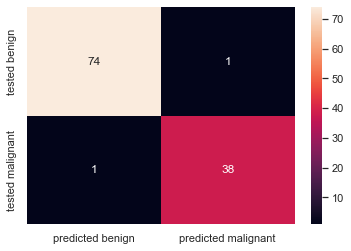

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,prediction)
print(cm)
sns.heatmap(cm,annot=True,xticklabels=['predicted benign','predicted malignant'],yticklabels=['tested benign','tested malignant'])

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.9824561403508771
